In [10]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from dotenv import load_dotenv
from langchain_core.output_parsers import StrOutputParser

load_dotenv()

True

In [2]:
class ChatState(TypedDict):

    topic : str
    response : str

In [17]:
model=ChatOpenAI()
parser=StrOutputParser()

def chat_model(state:ChatState)->ChatState:

    topic = state['topic']
    template=PromptTemplate(
        template='Answer about following topic. \n {topic}',
        input_variables=['topic']
    )
    # Manually
    # prompt=template.invoke({'topic':state['topic']})
    # response=model.invoke(prompt).content

    #Using chain

    chain = template | model

    response = chain.invoke({'topic' : topic}).content

    state['response']=response

    return state

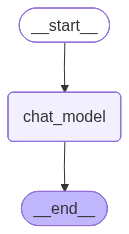

In [18]:
graph=StateGraph(ChatState)

graph.add_node('chat_model',chat_model)

graph.add_edge(START,'chat_model')
graph.add_edge('chat_model',END)

workflow=graph.compile()

workflow

In [19]:
initial_state={'topic': 'GenAI'}

final_state=workflow.invoke(initial_state)

final_state

{'topic': 'GenAI',
 'response': 'GenAI refers to the use of artificial intelligence (AI) technology in genetic research and analysis. It involves using machine learning algorithms to analyze, predict, and understand genetic data, such as DNA sequences and gene expressions. GenAI has the potential to revolutionize the field of genomics by speeding up analysis processes, identifying patterns and relationships in the data, and ultimately advancing our understanding of genetics and genetic diseases. This technology has already been used in a variety of research studies and is expected to have a significant impact on personalized medicine and precision healthcare in the future.'}